# Problem statement

As YOutube is the second most visited website
so from that we can do
postive sentiment analysis(Best,good,Remarkable)
emoji analysis
Dislike vs views analysis
trending video

# Sentiment analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
senti = pd.read_csv("UScomments.csv" , error_bad_lines = False) # we used error_bad_lines as we lnow one row dnot contain anything useful

C:\Users\hp\AppData\Local\Temp\ipykernel_5608\2319874451.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  senti = pd.read_csv("UScomments.csv" , error_bad_lines = False) # we used error_bad_lines as we lnow one row dnot contain anything useful
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\hp\AppData\Local\Temp\ipykernel_5608\2319874451.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  senti = pd.read_csv("UScomments.csv" , error_bad_lines = False) # we used error_bad_lines as we lnow one row dnot contain anything useful


In [3]:
senti.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


# now we have to take care of 2 things 
1- polarity 
2- subjectivity

In polarity we have either -1 values or +1 value 
for example we have sentence
I like this Project ---> so poloarity is +1

In subjectivity 
for example -> I am going to movie
so here we can see that there is nothing sentiment attached so it is considered as subjectivity

# some library that we use for sentiment analysis
1--> TextBlob---> whcih is a made on NLP library
2---> Vada
3--> Spacy

most powerful is Textblob

In [4]:
senti.isnull().sum()  #finding the total null values so that we can drop the bnull values

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
senti['comment_text'].dropna()

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691375, dtype: object

In [6]:
senti.dropna(inplace = True) #The statement senti.dropna(inplace=True) removes any missing values (NaN values) from the DataFrame senti and updates the DataFrame in place.

In [7]:
pip install textblob

In [8]:
from textblob import TextBlob

In [9]:
TextBlob('trending 😉').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [10]:
polarity=[]
for comment in senti['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [11]:
senti['polarity_values'] = polarity

In [12]:
senti.head(20)

,video_id,comment_text,likes,replies,polarity_values
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


# Now we are working on the Problem

# Wordcloud of your postive and negative sentence
so here we will store psotive sentence in one varaible and 
negative sentence in another varaible
now we identify post and negative
if polarity is +1 so its postive and -1 so its negative

so we can do this by using
filter commands
or by writing some query
or by using where() of np

In [13]:
senti['polarity_values']==1

0         False
1         False
2         False
3         False
4         False
          ...  
691395    False
691396    False
691397    False
691398    False
691399    False
Name: polarity_values, Length: 691375, dtype: bool

In [14]:
senti[senti['polarity_values']==1]

,video_id,comment_text,likes,replies,polarity_values
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [15]:
p = senti[senti['polarity_values']==1]
p

,video_id,comment_text,likes,replies,polarity_values
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [16]:
neg = senti[senti['polarity_values']==-1]
neg

,video_id,comment_text,likes,replies,polarity_values
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


# wordcloud
A word cloud is a graphical representation of textual data, where the size of each word is proportional to its frequency in the text. A word cloud can be used to visualize the most common words or themes in a piece of text.

To create a word cloud of positive and negative sentences, you would first need to identify the positive and negative sentences in your dataset. One way to do this is to use sentiment analysis to assign a polarity score to each sentence, with positive scores indicating positive sentiment and negative scores indicating negative sentiment.

Once you have identified the positive and negative sentences, you can create a word cloud for each set of sentences using a Python library like wordcloud.

In [17]:
pip install wordcloud

In [18]:
from wordcloud import WordCloud , STOPWORDS

In [19]:
comments_negative = neg['comment_text']

In [20]:
total_comments=' '.join(neg['comment_text'])



In [21]:
total_comments[0:100]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! "

(-0.5, 399.5, 199.5, -0.5)

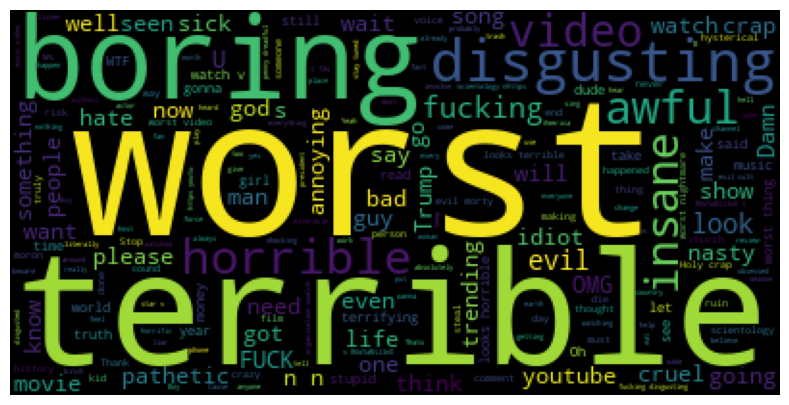

In [22]:
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

same for postive comments also

# emoji analysis

In [23]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install emojis

Note: you may need to restart the kernel to use updated packages.


In [25]:
import emoji


In [26]:
import emojis

In [27]:
senti.head(14)

,video_id,comment_text,likes,replies,polarity_values
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [28]:
print('\U0001F600') #unicode of this emoji

😀


in this line [c for c in senti if c in emoji.UNICODE_EMOJI_ENGLISH]
if you want to use emoji.UNICODE_EMOJI_ENGLISH then import emojis

In [42]:
import unicodedata
emojis_list = []
for comment in senti:
    emojis = [char for char in senti if "Emoji" in unicodedata.name(char, "")]
    emojis_list.append(emojis)

# Create a new Series with the extracted emojis
senti_emojis = pd.Series(emojis_list)

TypeError: name() argument 1 must be a unicode character, not str

# Analysis the most liked catergory

In [77]:
cat = pd.read_csv("category_file.txt", sep= ":" , skipinitialspace=True)  # we can use only one at a time sep= ":" or delimiter = "/t"
cat

,Category_id Category_name
1,\t\tFilm & Animation
2,\t\tAutos & Vehicles
10,\t\tMusic
15,\t\tPets & Animals
17,\t\tSports
18,\t\tShort Movies
19,\t\tTravel & Events
20,\t\tGaming
21,\t\tVideoblogging
22,\t\tPeople & Blogs


In [78]:
cat.reset_index(inplace=True)

In [79]:
cat

,index,Category_id Category_name
0,1,\t\tFilm & Animation
1,2,\t\tAutos & Vehicles
2,10,\t\tMusic
3,15,\t\tPets & Animals
4,17,\t\tSports
5,18,\t\tShort Movies
6,19,\t\tTravel & Events
7,20,\t\tGaming
8,21,\t\tVideoblogging
9,22,\t\tPeople & Blogs


In [80]:
cat.columns

Index(['index', 'Category_id      Category_name'], dtype='object')

In [81]:
cat.columns=['Category_id','Category_name']

In [82]:
cat

,Category_id,Category_name
0,1,\t\tFilm & Animation
1,2,\t\tAutos & Vehicles
2,10,\t\tMusic
3,15,\t\tPets & Animals
4,17,\t\tSports
5,18,\t\tShort Movies
6,19,\t\tTravel & Events
7,20,\t\tGaming
8,21,\t\tVideoblogging
9,22,\t\tPeople & Blogs


In [83]:
cat.set_index('Category_id', inplace = True)

In [71]:
cat

,Category_name
Category_id,
1,\t\tFilm & Animation
2,\t\tAutos & Vehicles
10,\t\tMusic
15,\t\tPets & Animals
17,\t\tSports
18,\t\tShort Movies
19,\t\tTravel & Events
20,\t\tGaming
21,\t\tVideoblogging


In [86]:
dic = cat.to_dict()

In [87]:
dic

{'Category_name': {1: '\t\tFilm & Animation',
  2: '\t\tAutos & Vehicles',
  10: '\t\tMusic',
  15: '\t\tPets & Animals',
  17: '\t\tSports',
  18: '\t\tShort Movies',
  19: '\t\tTravel & Events',
  20: '\t\tGaming',
  21: '\t\tVideoblogging',
  22: '\t\tPeople & Blogs',
  23: '\t\tComedy',
  24: '\t\tEntertainment',
  25: '\t\tNews & Politics',
  26: '\t\tHowto & Style',
  27: '\t\tEducation',
  28: '\t\tScience & Technology',
  29: '\t\tNonprofits & Activism',
  30: '\t\tMovies',
  31: '\t\tAnime/Animation',
  32: '\t\tAction/Adventure',
  33: '\t\tClassics',
  34: '\t\tComedy',
  35: '\t\tDocumentary',
  36: '\t\tDrama',
  37: '\t\tFamily',
  38: '\t\tForeign',
  39: '\t\tHorror',
  40: '\t\tSci-Fi/Fantasy',
  41: '\t\tThriller',
  42: '\t\tShorts',
  43: '\t\tShows',
  44: '\t\tTrailers            '}}

In [88]:
dic['Category_name']

{1: '\t\tFilm & Animation',
 2: '\t\tAutos & Vehicles',
 10: '\t\tMusic',
 15: '\t\tPets & Animals',
 17: '\t\tSports',
 18: '\t\tShort Movies',
 19: '\t\tTravel & Events',
 20: '\t\tGaming',
 21: '\t\tVideoblogging',
 22: '\t\tPeople & Blogs',
 23: '\t\tComedy',
 24: '\t\tEntertainment',
 25: '\t\tNews & Politics',
 26: '\t\tHowto & Style',
 27: '\t\tEducation',
 28: '\t\tScience & Technology',
 29: '\t\tNonprofits & Activism',
 30: '\t\tMovies',
 31: '\t\tAnime/Animation',
 32: '\t\tAction/Adventure',
 33: '\t\tClassics',
 34: '\t\tComedy',
 35: '\t\tDocumentary',
 36: '\t\tDrama',
 37: '\t\tFamily',
 38: '\t\tForeign',
 39: '\t\tHorror',
 40: '\t\tSci-Fi/Fantasy',
 41: '\t\tThriller',
 42: '\t\tShorts',
 43: '\t\tShows',
 44: '\t\tTrailers            '}

we convert the Category_name in to dictionary to extraxt that particular column and then we map it to df[catergory_id] and then we can plot the graph to see which category has mpost likes


now to see whether audience is engage or not
so it depends on three factors, likes , dislikes and comment rate
so we will find the 
like rates = df[likes]/df[views]*100
dislike rates = df[dislike]/df[views]*100
comment rates = df[comment]/df[views]*100

and then we can plot scatter graph